### Loading the dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
# loading the dataset
df = pd.read_excel("~/Desktop/OnlineRetail.xlsx")

In [3]:
# visualizing the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# checking shape
df.shape

(541909, 8)

### Pre - processing the dataset & exploring the dataset

In [5]:
# checking null values & datatypes
df.info()
# data contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<AxesSubplot:title={'center':'Count of Null values in all features of the Dataset\n\n\n'}>

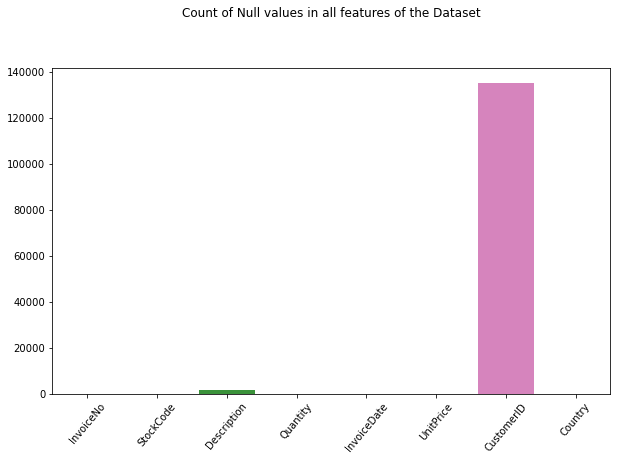

In [6]:
# checking null values
listCols = df.isnull().sum() 

plt.figure(figsize=(10, 6))
plt.xticks(rotation = 50)
plt.title("Count of Null values in all features of the Dataset\n\n\n")
sns.barplot(x = listCols.index, y = listCols.values)

In [7]:
# removing rows where customer id is null
df = df[df['CustomerID'].notna()]

In [8]:
# changing dtatypes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(np.int64)
df['Country'] = df['Country'] .astype(str)

In [9]:
# adding total price as a new column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [10]:
# adding 3 new columns from invoice date
df['InvoiceDate'] = df['InvoiceDate'].dt.date

df['InvoiceYear'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['InvoiceMonth'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['InvoiceDay'] = pd.DatetimeIndex(df['InvoiceDate']).day

In [11]:
# dropping invoice date
df.drop(['InvoiceDate'],inplace = True, axis = 1)

In [12]:
maxPrice = df['UnitPrice'].max() # finding maximum unit price
df[df['UnitPrice'] == maxPrice]

df1 = df.groupby(by="Country")['UnitPrice','Description'].max().sort_values('UnitPrice', ascending = False).iloc[0:10:]
df1 # top 10 items with highest unit price


/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,UnitPrice,Description
Country,,
United Kingdom,38970.00,ZINC WIRE SWEETHEART LETTER TRAY
France,4161.06,ZINC T-LIGHT HOLDER STARS SMALL
Singapore,3949.32,ZINC FOLKART SLEIGH BELLS
Spain,1715.85,ZINC T-LIGHT HOLDER STARS SMALL
EIRE,1687.17,ZINC WIRE SWEETHEART LETTER TRAY
Portugal,1241.98,ZINC WIRE KITCHEN ORGANISER
Norway,700.00,ZINC WILLIE WINKIE CANDLE STICK
Germany,599.50,ZINC WILLIE WINKIE CANDLE STICK
Canada,550.94,YELLOW COAT RACK PARIS FASHION


In [13]:
minPrice = df['UnitPrice'].min() # finding minimum unit price
df[df['UnitPrice'] == minPrice]

df1 = df.groupby(by="Country")['UnitPrice','Description'].min().sort_values('UnitPrice', ascending = False).head(10)
df1 # top 10 items with lowest unit price


/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,UnitPrice,Description
Country,,
Bahrain,1.25,CERAMIC CAKE BOWL + HANGING CAKES
Lithuania,1.25,BLUE FELT EASTER EGG BASKET
Brazil,0.85,CLOCK MAGNET MUM'S KITCHEN
Lebanon,0.55,12 EGG HOUSE PAINTED WOOD
European Community,0.55,3 TIER CAKE TIN GREEN AND CREAM
USA,0.42,SET 2 TEA TOWELS I LOVE LONDON
Saudi Arabia,0.42,ASSORTED BOTTLE TOP MAGNETS
United Arab Emirates,0.29,SPACEBOY BABY GIFT SET
Czech Republic,0.29,12 PENCILS SMALL TUBE RED RETROSPOT


/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:title={'center':'Top 10 best selling products\n\n\n'}, xlabel='Description', ylabel='Quantity'>

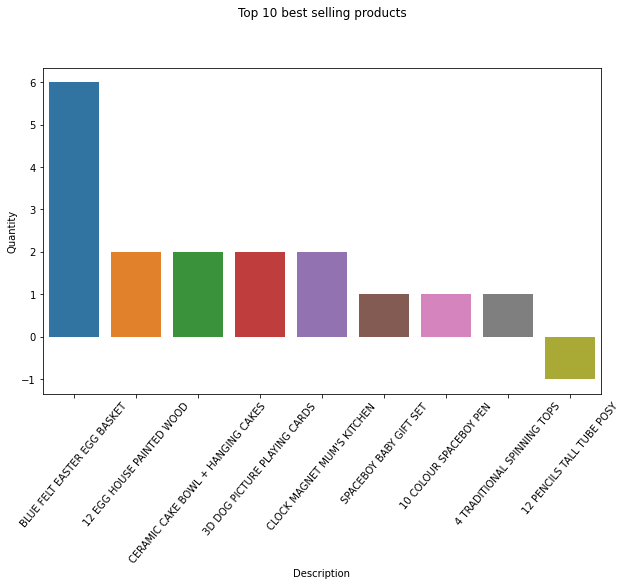

In [14]:
df1 = df.groupby(by="Country")['Quantity','Description'].min().sort_values('Quantity', ascending=False).iloc[0:10:]

plt.figure(figsize=(10, 6))
plt.xticks(rotation = 50)
plt.title("Top 10 best selling products\n\n\n")
sns.barplot(x= df1['Description'], y = df1['Quantity'])

# we see few quantities have negative quantity


In [15]:
# removing the rows with negative quantity
df = df[df.Quantity >= 0]

In [16]:
# dropping 3 columns
df.drop(['InvoiceNo'],inplace = True,axis = 1)
df.drop(['StockCode'],inplace = True, axis = 1)
df.drop(['Description'],inplace = True, axis = 1)

In [17]:
# label encoding country
encode = LabelEncoder()
df['Country'] = encode.fit_transform(df['Country'])

In [18]:
df.head()

,Quantity,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay
0,6,2.55,17850,35,15.30,2010,12,1
1,6,3.39,17850,35,20.34,2010,12,1
2,8,2.75,17850,35,22.00,2010,12,1
3,6,3.39,17850,35,20.34,2010,12,1
4,6,3.39,17850,35,20.34,2010,12,1


In [19]:
# scalling the data
df_scaled = StandardScaler().fit_transform(df)

### Performing PCA

In [20]:
# performing pca to retain 85% of the explained variance
pca = PCA(n_components = 0.85)
pcaData = pca.fit_transform(df_scaled)

In [21]:
pcaData.shape # 6 features were retained by pca

(397924, 6)

Text(0, 0.5, 'Explained variance (%)')

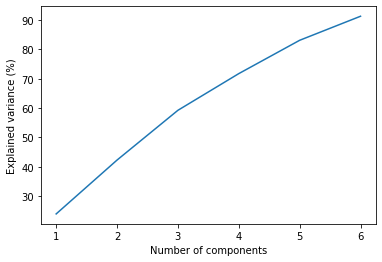

In [22]:
# plotting a scree plot

components = len(pca.explained_variance_ratio_)

plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

# approx 6 features explain 85% of variance

### Determoning optimum number of clusters

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


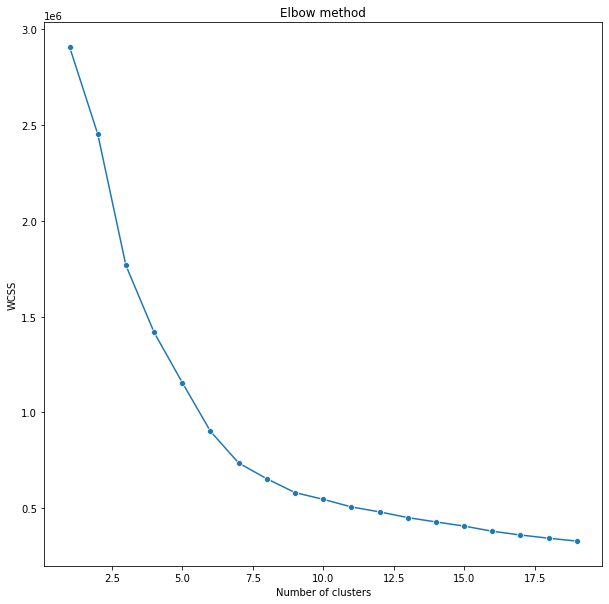

In [23]:
# determining the optimum number of clusters
temp = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(pcaData)
    temp.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))
sns.lineplot(range(1,20), temp, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# kmeans model for 7 clusters
kmeans = KMeans(n_clusters = 7)
label = kmeans.fit_predict(pcaData)

### Visualizing the number of clusters

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

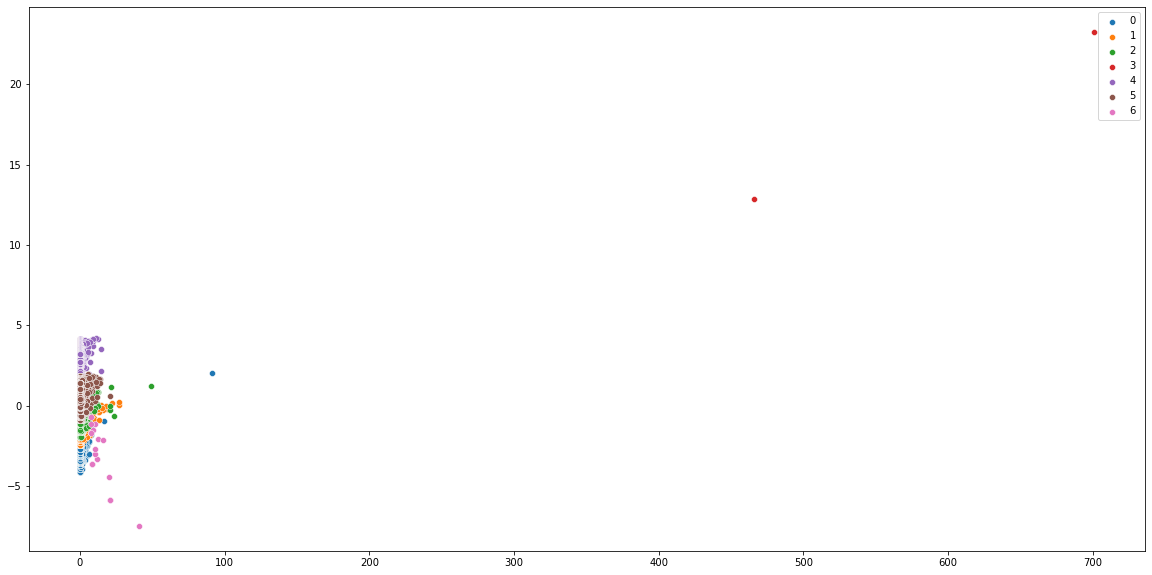

In [25]:
plt.figure(figsize=(20, 10))

u_labels = np.unique(label) # unique labels

# visualizing the clusters:
for i in u_labels:
    sns.scatterplot(pcaData[label == i , 0] , pcaData[label == i , 1] , label = i)
    
plt.legend()
plt.show()


### Visualizing clusters with respect to 2 PCA components

In [26]:
# calculating resulting components scores
scores_pca = pca.transform(df_scaled)

In [38]:
# creating new dataframe with original features and PCA's scores
newdf = pd.concat([df.reset_index(drop = True),pd.DataFrame(scores_pca)], axis = 1)

# renaming the columns
newdf.columns.values[-6:] = ['Component1','Component2','Component3','Component4','Component5','Component6']

newdf.head()

,Quantity,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,Component1,Component2,Component3,Component4,Component5,Component6
0,6,2.55,17850,35,15.30,2010,12,1,-0.128842,4.033365,-1.054585,0.062815,-0.206687,-1.756525
1,6,3.39,17850,35,20.34,2010,12,1,-0.115016,4.032874,-1.055663,0.100717,-0.205788,-1.756073
2,8,2.75,17850,35,22.00,2010,12,1,-0.105173,4.033891,-1.054245,0.070953,-0.206429,-1.756373
3,6,3.39,17850,35,20.34,2010,12,1,-0.115016,4.032874,-1.055663,0.100717,-0.205788,-1.756073
4,6,3.39,17850,35,20.34,2010,12,1,-0.115016,4.032874,-1.055663,0.100717,-0.205788,-1.756073


In [39]:
# adding kmeans clustering label
newdf['KmeansLabel'] = kmeans.labels_

In [40]:
# mapping 7 clusters
newdf['Segment'] = newdf['KmeansLabel'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})

/Users/amritaaash/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


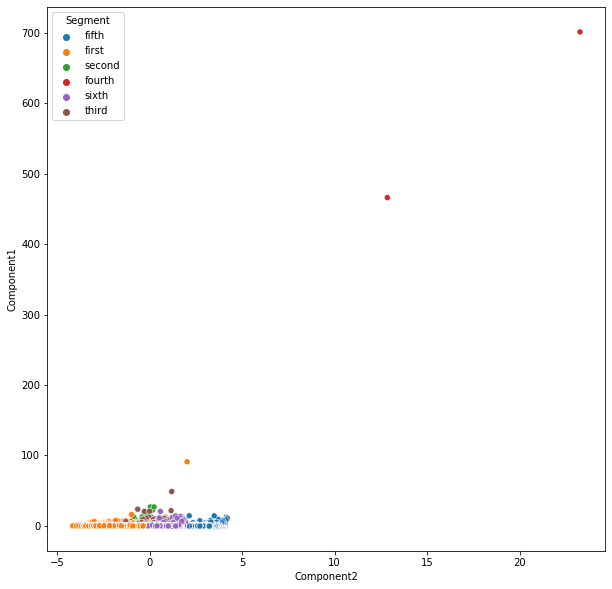

In [42]:
# visualizing clusters
x_axis = newdf['Component2']
y_axis = newdf['Component1']
plt.figure(figsize=(10, 10))
sns.scatterplot(x_axis,y_axis,hue = newdf['Segment'])
plt.show()